In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline




In [133]:
import getpass
import os

password = getpass.getpass()
command0 = "sudo -S rm -rf logs*"
command1 = "sudo -S python3 ./runner.py -t topo.yaml -x experiment_rr.yaml" 
command2 = "sudo -S python3 ./runner.py -t topo.yaml -x experiment_rtt.yaml" 
os.system('echo %s | %s' % (password, command1))
os.system('echo %s | %s' % (password, command2))




[sudo] password for ejogarv: 

RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler rr --path-stats-output ./logs_rr//rr0.csv >> ./logs_rr//server0.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rr//download0.csv>> ./logs_rr//client0.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler rr --path-stats-output ./logs_rr//rr1.csv >> ./logs_rr//server1.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rr//download1.csv>> ./logs_rr//client1.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/b

[sudo] password for ejogarv: 

RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler minRtt --path-stats-output ./logs_rtt//minRtt0.csv >> ./logs_rtt//server0.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rtt//download0.csv>> ./logs_rtt//client0.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --key ../quiche/apps/src/bin/cert.key --root ./ --scheduler minRtt --path-stats-output ./logs_rtt//minRtt1.csv >> ./logs_rtt//server1.log&
RUST_LOG=info ../quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output ./logs_rtt//download1.csv>> ./logs_rtt//client1.log
RUST_LOG=info ../quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ../quiche/apps/src/bin/cert.crt --

0

In [145]:
download_rr = pd.concat([ pd.read_csv("./logs_rr/download{}.csv".format(i)) for i in range(0,5) ])
download_rtt = pd.concat([ pd.read_csv("./logs_rtt/download{}.csv".format(i)) for i in range(0,5) ])

In [146]:
download_rr["mbps"] = download_rr["recv_bytes"] * 8 / (1024)/ download_rr["elapsed"]
download_rtt["mbps"] = download_rtt["recv_bytes"] * 8 / (1024)/ download_rtt["elapsed"]


Text(0.5, 1.0, 'Download speed (Mbps)')

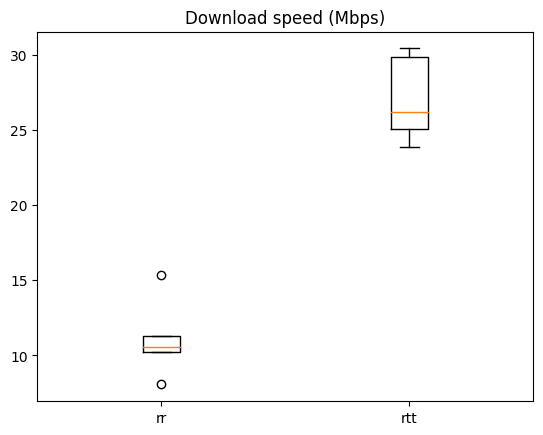

In [147]:

plt.boxplot([download_rr["mbps"], download_rtt["mbps"]], labels=["rr", "rtt"])
plt.title("Download speed (Mbps)")

In [148]:
rr_stats = pd.read_csv("./logs_rr/rr0.csv")
rr_stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt
0,34,10.0.3.10:4433,10.0.1.1:5555,1200,357,13500,1200,0
1,46,10.0.3.10:4433,10.0.1.1:5555,1683,527,13500,483,11
2,61,10.0.3.10:4433,10.0.1.1:5555,3033,737,13500,1278,11
3,73,10.0.3.10:4433,10.0.1.1:5555,4383,784,13500,1350,11
4,84,10.0.3.10:4433,10.0.1.1:5555,5733,831,13500,1350,11


In [149]:
rtt_stats = pd.read_csv("./logs_rtt/minRtt0.csv")
rtt_stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt
0,36,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0
1,51,10.0.3.10:4433,10.0.1.1:5555,15183,736,13500,13428,11
2,51,10.0.3.10:4433,10.0.1.1:5555,15255,736,13500,13500,11
3,63,10.0.3.10:4433,10.0.1.1:5555,28755,924,25650,13572,12
4,64,10.0.3.10:4433,10.0.1.1:5555,40905,971,25650,25650,12


In [150]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

rr_lte = rr_stats[rr_stats['remote']==remote_addr_lte]
rr_wifi = rr_stats[rr_stats['remote']==remote_addr_wifi]
rtt_lte = rtt_stats[rtt_stats['remote']==remote_addr_lte]
rtt_wifi = rtt_stats[rtt_stats['remote']==remote_addr_wifi]

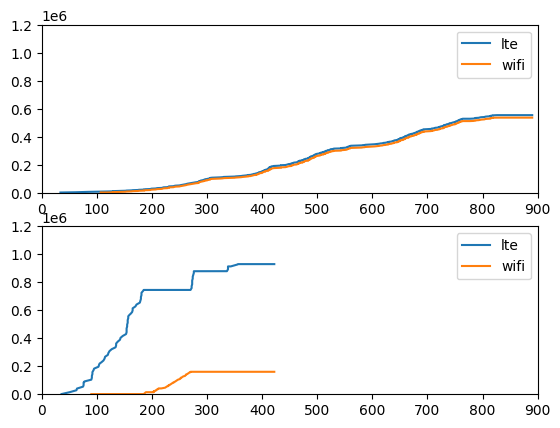

In [151]:
figure,axis =plt.subplots(2,1)

axis[0].plot(rr_lte["elapsed"], rr_lte["sent_bytes"], label="lte")
axis[0].plot(rr_wifi["elapsed"], rr_wifi["sent_bytes"], label="wifi")
axis[0].set_xlim([0,900])
axis[0].set_ylim([0,1.2e6])
axis[0].legend()

axis[1].plot(rtt_lte["elapsed"], rtt_lte["sent_bytes"], label="lte")
axis[1].plot(rtt_wifi["elapsed"], rtt_wifi["sent_bytes"], label="wifi")
axis[1].set_xlim([0,900])
axis[1].set_ylim([0,1.2e6])
axis[1].legend()




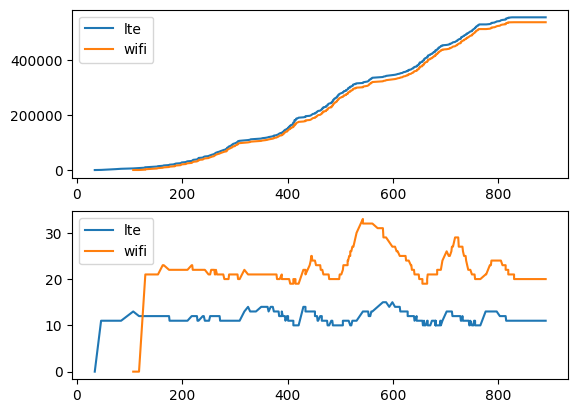

In [152]:
figure,axis =plt.subplots(2,1)

axis[0].plot(rr_lte["elapsed"], rr_lte["sent_bytes"], label="lte")
axis[0].plot(rr_wifi["elapsed"], rr_wifi["sent_bytes"], label="wifi")
axis[0].legend()
axis[1].plot(rr_lte["elapsed"], rr_lte["rtt"], label="lte")
axis[1].plot(rr_wifi["elapsed"], rr_wifi["rtt"], label="wifi")
axis[1].legend()


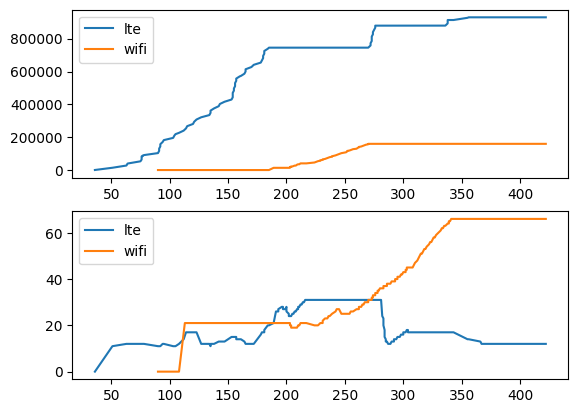

In [153]:
figure,axis =plt.subplots(2,1)

axis[0].plot(rtt_lte["elapsed"], rtt_lte["sent_bytes"], label="lte")
axis[0].plot(rtt_wifi["elapsed"], rtt_wifi["sent_bytes"], label="wifi")
axis[0].legend()
axis[1].plot(rtt_lte["elapsed"], rtt_lte["rtt"], label="lte")
axis[1].plot(rtt_wifi["elapsed"], rtt_wifi["rtt"], label="wifi")
axis[1].legend()


In [155]:
plt.plot(rtt_lte["elapsed"], rtt_lte["cwnd"], label="lte")


KeyError: 'cwnd'